### Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), build a model that can predict wether or not a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. 

The "loan_status" column contains our label.

### Data Overview

Here is the information on this data set from kaggle:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
---
-

In [1]:
# IMPORTING THE PRIMARY LIBRARIES FOR PROJECT

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
%matplotlib inline

In [2]:
# IMPORTING THE DATA AND VIEW ONLY THE FIRST FIVE ROWS

df = pd.read_csv('lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## Exploratory Data Analysis
Let me first explore the data to gain some insight before proceeding to featuring engineering and preprocessing, and finally ending with the model development.

In [3]:
# FINDING OUT THE NATURE OF THE DATA SET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

*Comments:* There are 396,030 observations and 27 columns. The data types for each column is either float or object (string). Some of the columns like emp_title and title are having missing values. The missing values will be addressed during the feature engineering section.

In [4]:
# FINDING THE SUMMARY STATISTICS OF THE DATA SET

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


#### Comments: 
1. The highest amount of loan taken was 40000 USD and the least was 500 USD. However, majority of the borrowers took an amount between 8000USD and 20000USD.
2. The highest interest rate (int_rate) was almost 40% and the least was 5.32%, whiles majority of the loans had interest rate ranging from 10.49% to 16.49%.

Most of the statistics given about the various features will be explored further to get the detailed information.

In [5]:
# LET ME EXPLORE THE LABEL FOR THIS DATA SET WHICH IS LOAN STATUS

df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

*comment:*  Thus, out of the 396,030 people who came for a loan, 318,357 fully paid their loan with interest whiles 77,673 defaulted(charged off).
Let me represent this visually below.

Text(0.5, 1.0, 'Loan Status of Borrowers')

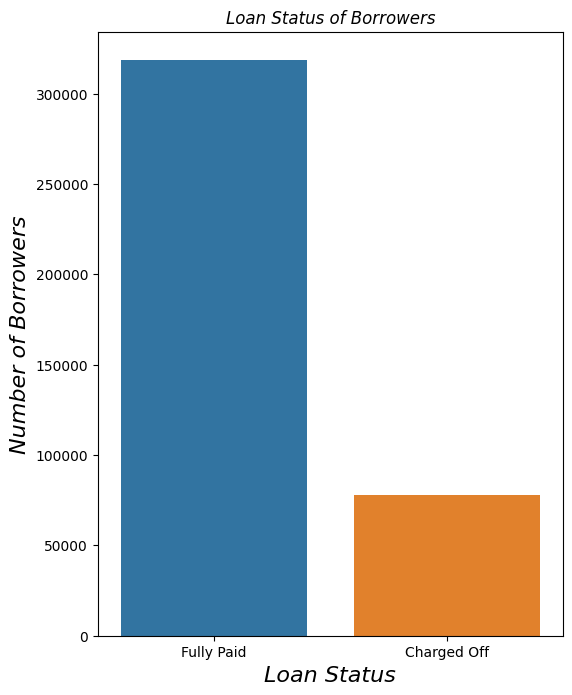

In [6]:
plt.figure(figsize=(6,8), dpi=100)
sns.countplot(data=df, x='loan_status')

plt.ylabel('Number of Borrowers',fontdict={'fontstyle': 'oblique'}, size=16)
plt.xlabel('Loan Status', fontdict={'fontstyle': 'oblique'}, size=16)

plt.title("Loan Status of Borrowers", size=12, fontdict={'fontstyle':'italic'})

In [7]:
"""""
FINDING THE WHICH OF THE CONTINOUS (FLOAT) FEATURES CORRELATE WITH THE LABEL. THIS WILL HELP ME TO EXPLORE THE CONTINUOUS FEATURES
BUT FIRST I HAVE TO CONVERT THE LOAN_STATUS ITEMS TO NUMERIC AND SAVE THE NAME AS PAYMENT_STATUS SINCE CORRELATION WORKS WITH NUMERIC DATA TYPES.
"""""
# I WILL ASSIGN 1 TO FULLY PAID AND 0 TO CHARGED OFF
df['payment_status'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

# DISPLAY THE CORRELATION THE NUMERICAL FEATURES HAS WITH PAYMENT_STATUS
print(df.corr()['payment_status'].sort_values())
correlation = df.corr()['payment_status'].sort_values()

# DISPLAY THE TABLE TO CHECK IF FULLY PAID HAS BEEN ASSIGNED TO 1 AND CHARGED OFF ASSIGNED TO 0
df[['payment_status', 'loan_status']].head()

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
payment_status          1.000000
Name: payment_status, dtype: float64


,payment_status,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


Text(0.5, 1.0, 'Correalation Between Numerical Features And Loan Status')

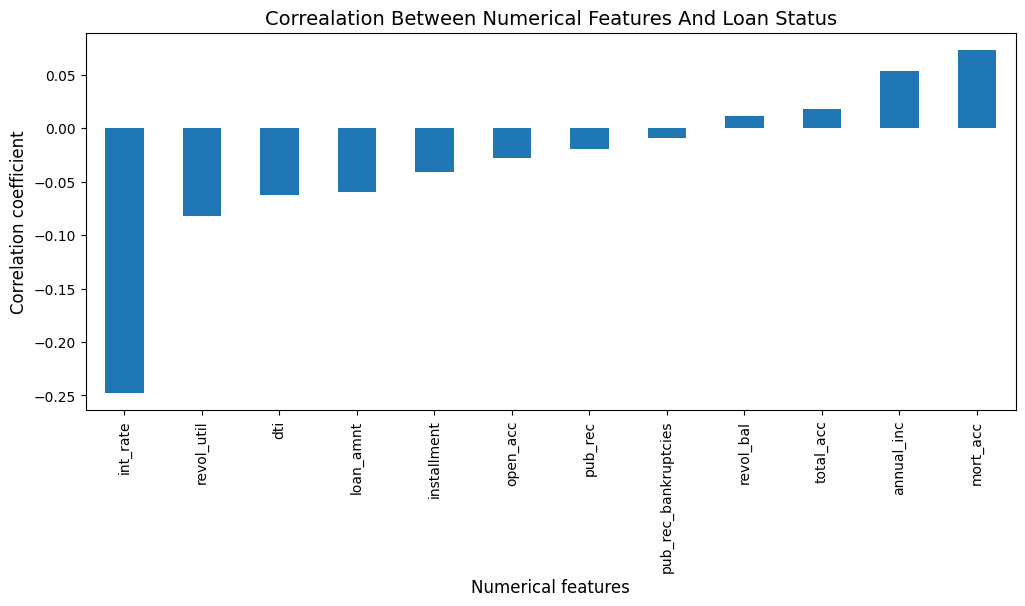

In [8]:
# LET ME DISPLAY THE ABOVE CORRELATION IN A BAR GRAPH
plt.figure(figsize=(12,5), dpi=100)
correlation[:-1].plot(kind = 'bar')

plt.xlabel("Numerical features", size=12)
plt.ylabel("Correlation coefficient", size=12)

plt.title("Correalation Between Numerical Features And Loan Status", size=14)

*Comment:* 
1. Thus, the interest rate of the loan has the highest correlation with the loan status followed by revolving utilization rate (revol_util), followed by number of mortage account (mort_acc) with the least being number of public record bankruptcies bankrupt (pub_rec_bankruptcies).

2. Features such as interest rate, Revolving Utilization Rate(revol_util), dti, loan amount(loan_amount), installment, open_acc and public record bankruptcies (pub_rec_bankruptcies) all have negative correlation with the loan status. This means, the higher value of any of them, the higher the chance of the borrower going to default the loan, and the vice versa. However, features such as revol_bal, total_acc, annual_inc and mort_acc have positive correlation with loan status implying that when any of them increases in value, the higher the chance of the borrower paying fully the loan, and vice versa.

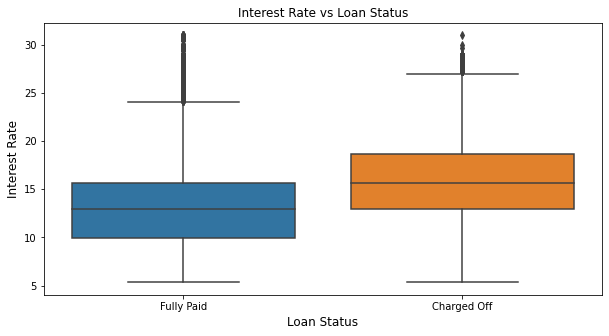

In [9]:
# NOW LET ME EXPLORE THESE FEATURES ONE BY ONE.
plt.figure(figsize=(10,5))
sns.boxplot(data=df, y='int_rate', x='loan_status');
plt.title('Interest Rate vs Loan Status');

plt.xlabel('Loan Status', size = 12);
plt.ylabel('Interest Rate', size=12);

*COMMENT:* From the Boxplot above, borrowers who fully paid their loans had 75% of their interest rates being below 17% whiles 75% of those who defaulted. Again, it is found that the borrower with the highest interest was a borrower who defaulted. It can be concluded that those who defaulted their loan had higher interest rates than those who fully paid their loans.Thus, the higher the interest rate on a loan, the likely the borrower will default. This makes sense since people find it difficult paying their debt when the debt has higher interest rate.

<AxesSubplot:xlabel='loan_status', ylabel='mort_acc'>

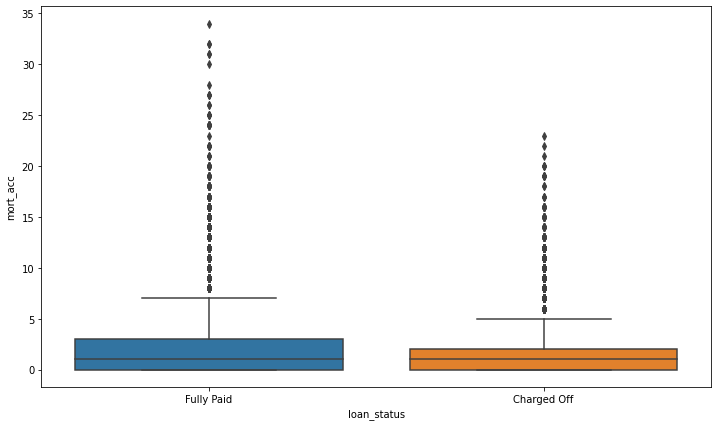

In [10]:
# NOW LET ME TAKE A FEATURE THAT HAS POSITIVE CORRELATION WITH THE LOAN STATUS. LET ME USE THE HIGHEST POSITIVE CORRELATED FEATURE
plt.figure(figsize=(12,7))
sns.boxplot(data=df, x='loan_status', y='mort_acc')

*COMMENTS:* We can see from the two boxplots that the borrower with the highest mortgage accounts falls in the category of those who fully paid their debt. We can also observe that about upper 50% of those who paid the fully their debt had more more mortage accounts than those who defaulted. Confirming that mort_acc has a positive relationship with loan status. Thus, a borrower with more mortgage accounts turns to pay fully their loan than those with few number of mortgage accounts.

In [11]:
# df.groupby('loan_status').describe

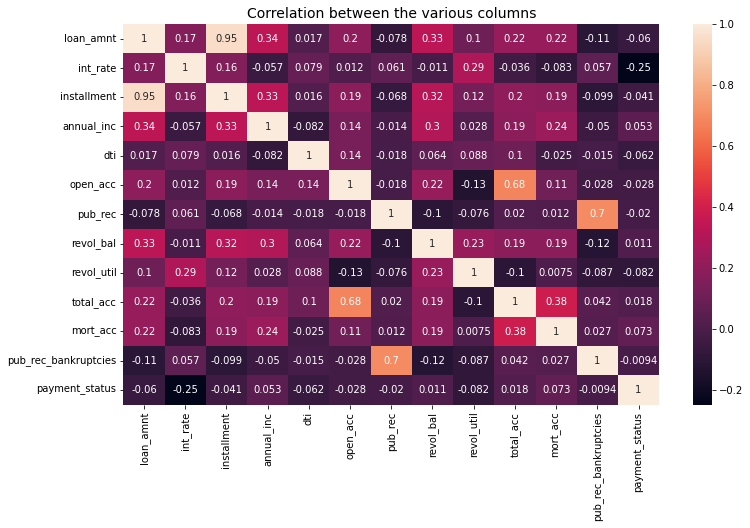

In [12]:
# LET ME FIND THE CORRELATION THAT EXIST BETWEEN THE FEATURES
plt.figure(figsize=(12,7))
sns.heatmap(data=df.corr(),annot=True)

plt.title('Correlation between the various columns', size=14);

*COMMENTS:* 1. loan amount and installment has the highest correlation coefficient of 0.95. This is very understandable since installment is the amount of loan given plus the interest on the loan. Thus, the higher the loan amount, the higher the amount to be paid whiles the opposite is true.
2. Number of public record bankruptcies(pub_rec_bankrutcies) and Number of degarotory public records(pub_rec) also have strong correlation of 0.7
3. Open_acc and total_acc also have strong correlation of 0.68


<Figure size 1400x600 with 0 Axes>

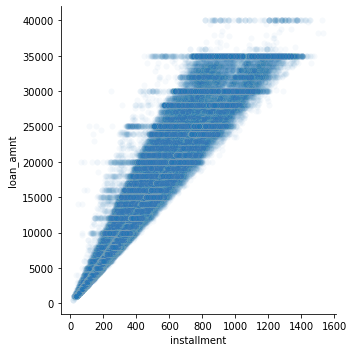

In [13]:
# LET ME DISPLAY THE RELATIONSHIP BETWEEN LOAN AMOUNT AND INSTALLMENT

plt.figure(figsize=(14,6),dpi=100);
sns.relplot(data=df, x='installment', y = 'loan_amnt', alpha=0.04);

We can see from the relationship between loan amount and installment that the bigger the loan_amount, the bigger the installment amount to be paid by the borrower.

## Exploring object datatypes

In [14]:
# LET ME EXPLORE THE COLUMNS WITH STRING(OBJECT) DATA TYPES

df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

<AxesSubplot:xlabel='term', ylabel='count'>

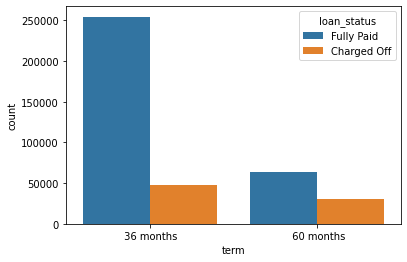

In [15]:
# LET ME EXPLORE EACH OF THEM 

sns.countplot(data=df, x='term', hue='loan_status')

Both those who are given 36 months and 60 months categories has more borrowers fully paying their loans than those who who are charged off. It can also be seen that both those who fully pay their loans and those who default in the 36 months term are more than those who fully paid their loans and defaulted in the category of 60 months term.

In [16]:
ordered_grade = sorted(df['grade'].unique()) 
ordered_grade

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [17]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

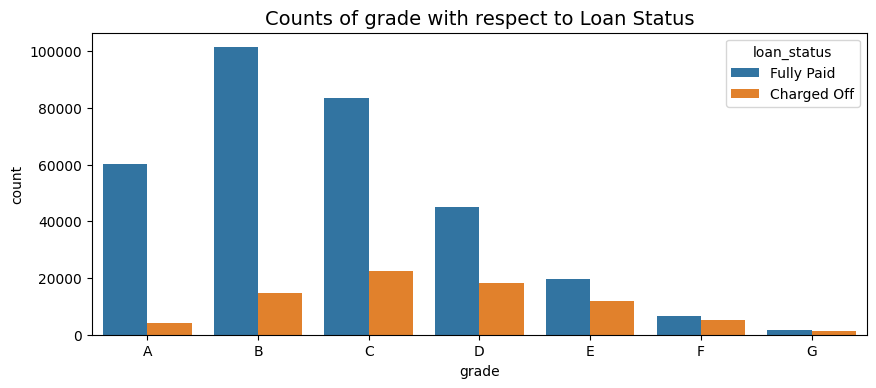

In [18]:
plt.figure(figsize=(10,4),dpi=100)

sns.countplot(data=df, x='grade', order =ordered_grade, hue='loan_status' );
plt.title('Counts of grade with respect to Loan Status', size=14);

*Comment:* We can see from the graph that those who are graded in F and G are borrowers who equal chance of paying full their debt, but those graded in A-D are more likely to pay their debt than to default in paying.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

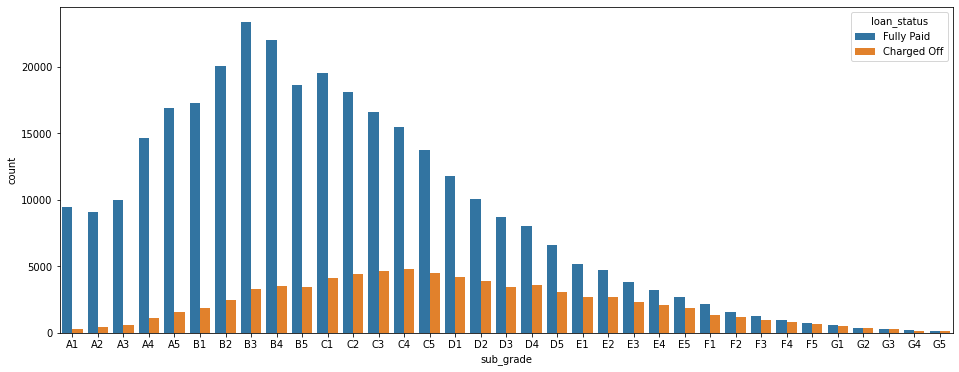

In [19]:
# LET ME FIND OUT IF ANY OF THE SUB_GRADE CATEGORY WILL GIVE ADDITIONAL INFORMATION FROM THE INFORMATION GIVEN IN GRADE

plt.figure(figsize=(16,6))
sns.countplot(data=df, x='sub_grade',order=sorted(df['sub_grade'].unique()), hue='loan_status')

It can be seen that those in sub_grade F2-G5 are equally to default the payment of their debt as in making full payment of it. Thus, there is no new additional information given from the information obtained from the grade feature.


## Data Processing

let me  end the exploratory analysis and move to processing of the data.

In [20]:
# FIRST I WANT TO EXTRACT THE STATE FROM WHICH EACH BORROWER WAS LIVING FROM THE ADDRES FEATURE.

df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

In [21]:
# LET ME SPLIT AND GET THE STATE FROM THE ADDRESS GIVEN BY THE BORROWERS AND ASSIGNED IT TO STATE VARIABLE. 

df['state']= df['address'].str.split(',').str.get(1)
df['state']

df['state']= df['state'].str.split(" ").str.get(1)
df['state']= df['state'].str.lstrip().str.rstrip().str.strip()

df['state']

0         OK
1         SD
2         WV
3         MA
4         VA
          ..
396025    DC
396026    LA
396027    NY
396028    FL
396029    AR
Name: state, Length: 396030, dtype: object

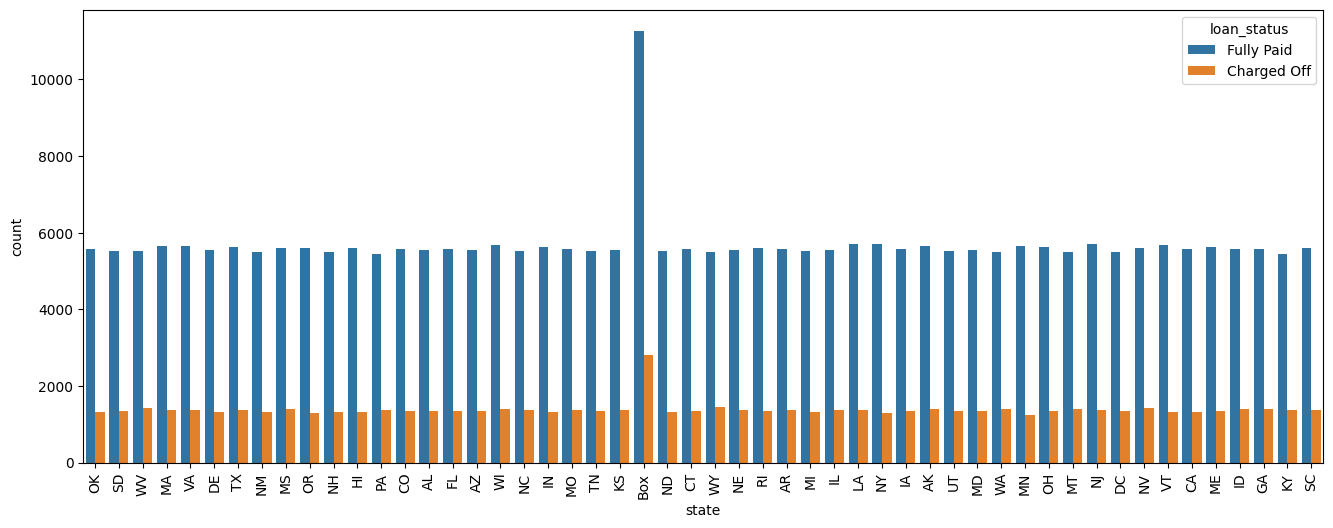

In [22]:
# LET ME FIND THE LOAN STATUS OF EACH STATE BORROWERS WERE LIVING.

plt.figure(figsize=(16,6),dpi=100)
sns.countplot(data=df, x='state', hue='loan_status');
plt.xticks(rotation=90);

All the states have high numbers of people fully paying than those who default. I wanted to know if at least one state will have the number of those who defaulted being more than those who fully paid. Well let me find out the state that has high percentage of defaulting.

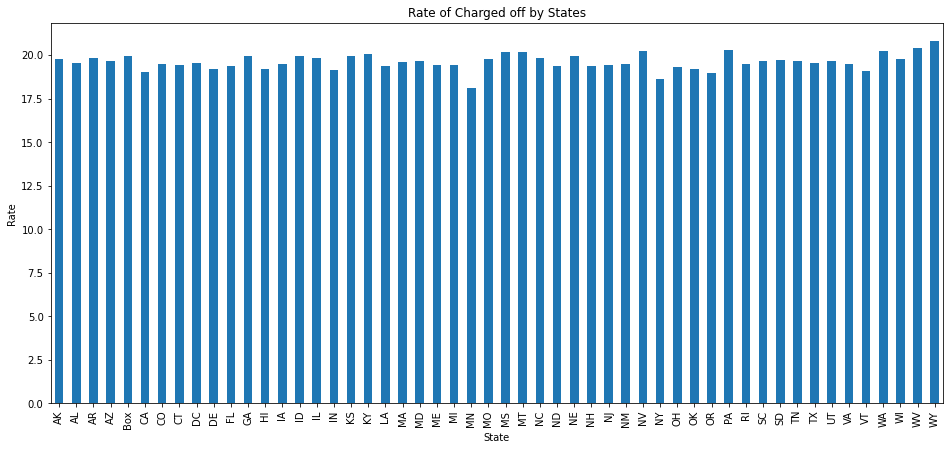

In [23]:
# FINDING THE NUMBER OF BORROWERS WHO DEFAULTED IN EACH STATE
state_default = df[df['loan_status']=='Charged Off'].groupby('state').count()['loan_status']

# FINDING THE NUMBER OF BORROWERS WHO PAID IN EACH STATE
state_paid = df[df['loan_status']=='Fully Paid'].groupby('state').count()['loan_status']

# VISUALIZING THE PERCENTAGE OF THOSE WHO DEFAULTED FROM EACH STATE 
plt.figure(figsize=(16,7))
(100*state_default/(state_default + state_paid)).plot(kind='bar')

plt.ylabel('Rate');
plt.xlabel('State');
plt.title('Rate of Charged off by States');

We can see that WY which stands for Wyoming State has the highest rate of defaulting payment of loan whiles MN which stands for Minnesota had least rate of defaulting payment.

In [24]:
# LET ME EXTRACT THE ZIPCODE AND FIND OUT IF THE UNIQUE ZIPCODES AREN'T MANY SO I CONVERT TO DUMMIES

df['zipcode'] = df['address'].apply(lambda address: address[-5:])
df['zipcode']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zipcode, Length: 396030, dtype: object

In [25]:
# SINCE THE ADDRESS FEATURE HAS SO MANY UNIQUE ITEMS, AND DOESN'T REALLY GIVE ANY INFORMATION I WILL REMOVE IT.

df = df.drop('address',axis=1)

In [26]:
# ALSO, I WILL HAVE TO REMOVE THE GRADE CATEGORY SINCE THE INFORMATION IT GIVES IS IMBEDDED IN THE GRADE CATEGORY

df = df.drop('grade', axis=1)

In [27]:
#FINDING OUT THE NUMBER OF UNIQUE ITEMS IN THE EMPLOYMENT TITLE OF THE BORROWER

df['emp_title'].nunique()

173105

Since there are 173,105 employment titles, it would consume more computing power and time in building the building. Thus, it is prudent to remove it from the features since it will not contribute to building a good model.

In [28]:
df = df.drop('emp_title',axis=1)

In [29]:
df.shape

(396030, 27)

In [30]:
# LET ME FIND OUT THE TITLE GIVEN FOR THE PURPOSE OF THE LOAN AND PURPOSE FOR THE LOAN.

df['title'].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

We can see that the titles provided for the loan are many, and there are many borrowers whose title are unique for instance only one borrower titled the purpose for his/her loan as title 'Daughter's Wedding Bill'. This won't help the model to train well. thus, title ought to be removed. 

In [31]:
df['purpose'].value_counts()

# Since the number of those who applied for educational and renewable energy are very small, will add their number to 'other'

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [32]:
df['purpose'].dtype

dtype('O')

In [33]:
df['purpose'] = df['purpose'].str.replace('educational','other')
df['purpose'] = df['purpose'].str.replace('renewable_energy','other')

In [34]:
# plt.figure(figsize=(14,6))
# sns.countplot(data=df, x='purpose',hue='loan_status');
# plt.xticks(rotation=90);

In [35]:
df.select_dtypes('object').columns

# THE 'ISSUE_D' HAVE TO BE REMOVED SINCE TRAINING THE MODEL ON IT WILL SERVE AS DATA LEAKAGE. AND I WILL ALSO REMOVE THE STATE COLUMN

Index(['term', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type', 'state',
       'zipcode'],
      dtype='object')

In [36]:
# REMOVING THE STATE COLUMN I ADDED.

df = df.drop(['title','state'],axis=1)

In [37]:
# LET ME CHECK EARLIEST_CR_LINE

df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 396030, dtype: object

In [38]:
# LET ME EXTRACT THE YEAR FROM THE DATE OF EARLIEST_CR_LINE BUT FIRST LET ME CHECK THE DATE TYPE.

df['earliest_cr_line'].dtype

dtype('O')

In [39]:
# CONVERTING OBJECT DTYPE TO DATETIME DATA TYPE

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['earliest_cr_line']

0        1990-06-01
1        2004-07-01
2        2007-08-01
3        2006-09-01
4        1999-03-01
            ...    
396025   2004-11-01
396026   2006-02-01
396027   1997-03-01
396028   1990-11-01
396029   1998-09-01
Name: earliest_cr_line, Length: 396030, dtype: datetime64[ns]

In [40]:
# LET ME EXTRACT THE 'YEAR' COMPONENT FROM THE DATETIME AND REASSIGNED IT TO 'EARLIEST_CR_LINE'

df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date:date.year)
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 396030, dtype: int64

In [41]:
df.select_dtypes('object').columns

Index(['term', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'initial_list_status', 'application_type', 'zipcode'],
      dtype='object')

*NOTE:*

Since I won't know beforehand when a loan will be issued(given), adding the issue_date to the model will result in data leakage thus, ought to be removed


In [42]:
df = df.drop('issue_d',axis=1)

In [43]:
df['home_ownership'].value_counts()

# let me add the ANY and NONE to other otherwise, they won't be significant for the model.

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [44]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

#LET ME CHECK IF THE CHANGE HAS BEEN AFFECTED
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [45]:
#FINDING THE NUMBER OF DISTINCT ITEMS IN VERIFICATION STATUS

df['verification_status'].nunique()

3

## Finding out missing values and handle them

In [46]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
payment_status              0
zipcode                     0
dtype: int64

In [47]:
100*(df.isnull().sum()/len(df))

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
sub_grade               0.000000
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
payment_status          0.000000
zipcode                 0.000000
dtype: float64

All the columns with 5% or less missing values will have those missing values removed. Now let me explore the Number of Mortgage Accounts. 

In [48]:
df['mort_acc'].dtype

dtype('float64')

In [49]:
len(df)

396030

In [50]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [51]:
df['mort_acc'].describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

From the summary statistics of the Number of Mortgage Accounts a borrower have, we see that the highest number of mortgage a borrower had was 34 and the minimum is zero. We can also see that 75% of the borrowers have not more than 3 mortage account. It will be reasonable to fill the missing values with one since one is the median value for the number of mortgage accounts a customer has. We used the median instead of the mean since the distribution is skewed. But on a second thought, it would be better to fill the missing values with zero since almost half of the borrowers had no mortgage account. Since the data is huge, I can also choose to drop the missing values of mort_acc since the missing values is almost 10% of the total mort_acc data set. However, I will choose to fill the missing values with zero.

In [52]:
df['mort_acc'] = df['mort_acc'].fillna(0)

In [53]:
# LET ME FIRST REMOVE THE MISSING VALUES LESS THAN 6%. THIS WILL REDUCE THE MISSING VALUES IN THE MORT_ACC IF THEY HAVE MISSING VALUES AS WELL IN THE OTHER MISSING VALUE COLUMNS

df= df.dropna(subset=['emp_length','revol_util','pub_rec_bankruptcies'])


In [54]:
# NOW LET ME CHECK IF THERE EXIST ANY MISSING VALUES

df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
payment_status          0
zipcode                 0
dtype: int64

In [55]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [56]:
df.groupby('application_type').count()['loan_status']

application_type
DIRECT_PAY       261
INDIVIDUAL    376292
JOINT            376
Name: loan_status, dtype: int64

## CONVERT CATORICAL DATA TO DUMMY VARIABLES

In [57]:
df.select_dtypes('object').columns

Index(['term', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'initial_list_status',
       'application_type', 'zipcode'],
      dtype='object')

In [58]:
# NOW LET ME DROP THE PAYMENT_STATUS TO PREVENT DUPLICATE
df=df.drop('payment_status', axis=1)

# CONVERTING THE CATEGORICAL DATA TO DUMMIES, AND DEFINING FEATURES AND LABEL
X = df.drop(['loan_status'],axis=1)

X = pd.get_dummies(X, drop_first=True)


y = df['loan_status']

In [59]:
# NOW LET ME FIND OUT THE COLUMN NAMES OF THE FEATURES

X.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'term_ 60 months',
       'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3',
       'sub_grade_G4', 'sub_grade_G5', 'emp_length_10+ years',
       'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years',
       'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years',
   

## Now To The Machine Learning

#### NOW LET ME SPLIT THE ENTIRE DATA INTO TRAIN, VALIDATION AND TEST SETS

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# SPLITTING THE TRAIN SET FROM TEST AND VALIDATION SET

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)

In [62]:
# SPLITTING THE REMAINING SET INTO VALIDATION AND TEST SETS

X_validation,X_test,y_validation,y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=101)

#### FEATURE PREPROCESSING

In [63]:
# IMPORTING THE SCALER FOR SCALING THE FEATURES

from sklearn.preprocessing import MinMaxScaler

In [64]:
# CREATING AN INSTANCE OF THE MINMAXSCALER

scaler = MinMaxScaler()

In [65]:
# IMPORTING THE INPUT/FEATURES DATA SETS

X_scaled_train = scaler.fit_transform(X_train)

X_scaled_validation = scaler.transform(X_validation)

X_scaled_test = scaler.transform(X_test)

Usually, I use the adaptive boosting as my benchmark model since it doesn't include many hyperparameters to tune, and also performes well on variety of data set. so I will use the AdaBoostClassifier and then use Artificial Neural Network which also performes very well. Using Support Vector Machines really takes more time to train so I use it when the earlier algorithms I use aren't performing well.

In [66]:
# LET ME IMPORT THE ADABOOST

from sklearn.ensemble import AdaBoostClassifier

ad_model = AdaBoostClassifier(random_state=42)

ad_model.fit(X_scaled_train,y_train)

AdaBoostClassifier(random_state=42)

In [67]:
# LET ME IMPORT THE PERFORMANCE METRICS TO MEASURE THE PERFORMANCE OF THE MODEL

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

              precision    recall  f1-score   support

 Charged Off       0.98      0.45      0.62      7362
  Fully Paid       0.88      1.00      0.94     30331

    accuracy                           0.89     37693
   macro avg       0.93      0.72      0.78     37693
weighted avg       0.90      0.89      0.87     37693



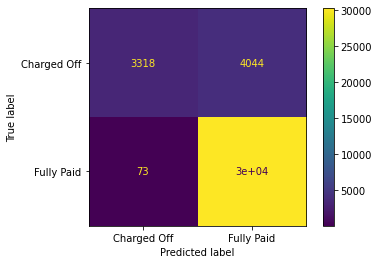

In [68]:
# MAKE PREDICTION FROM THE x_SCALED_VALIDATION SET
pred = ad_model.predict(X_scaled_validation)

# LET FIND THE CLASSIFICATION_REPORT
print(classification_report(y_validation, pred))

# DISPLAY THE CONFUSION MATRIX
ConfusionMatrixDisplay.from_predictions(y_validation,pred)

In [69]:
confusion_matrix(y_validation,pred)

array([[ 3318,  4044],
       [   73, 30258]], dtype=int64)

### COMMENT ON THE MODEL PERFORMANCE

The accuracy which is 89% indicate that the model is performing well on the data however, this is misleading because the number of borrowers who fully paid their debt was far more than those who defaulted. This means that, the model will be good in predicting a borrower who will make full payment of his/her loan but will perform very poor on predicting those who will be Charged Off. For this reason, the accuracy isn't a good measure of performance for this model. Thus, the attention should be on the recall and precision. The precision has very good scores of 98% for both those who fully pay and those who default. As it can be seen from the ConfusionMatrixDisplay, the model rightly predicted that 30,258 would fully pay their debt, and was also right in predicting that 3318 of the borrowers would be Charged off. However, it wrongly predicted 78 of them would be Charged Off but they actually made the payment. Now, this number (78) is not that huge so if the company deny offering loan to 78 people out of the 37,693 people who applied for loan. However, the real problem is the model predicting that 4044 of the borrowers would fully pay their loan when in reality they where Charged off(defaulted); this will bring greater loss to the firm. This is what is reflected in the recall of the Charged Off which 45%. The f1_score which is the harmonic mean of precision score and recall score is 62%. So if you improve the recall, the f1_score will improve provided the precision score isn't reduced. So, the main focuse should be on the f1_score.Thus, the goal now is to improve on the f1_score for the Charged off. By this, we will know the model is going to performe well on predicting a borrower who will default or fully pay. 

In [70]:
# LET ME IMPORT GRIDSEARCH FOR PARAMETER TUNING

from sklearn.model_selection import GridSearchCV

In [71]:
# params = {"n_estimators":[45,50,68,85],
#          "learning_rate":[0.01,0.1,0.5]}

In [72]:
# grid_model = GridSearchCV(estimator=ad_model, param_grid=params)

In [73]:
# grid_model.fit(X_scaled_train,y_train)

In [74]:
X.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'term_ 60 months',
       'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3',
       'sub_grade_G4', 'sub_grade_G5', 'emp_length_10+ years',
       'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years',
       'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years',
   

## ARTIFICIAL NEURAL NETWORK (ANN)

In [75]:
df['loan_status'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
df['loan_status']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 376929, dtype: int64

In [76]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'zipcode'],
      dtype='object')

In [77]:
#DEFINING TARGET AND FEATURES AND CONVERT THE CATEGORICAL TO DUMMIES
X = df.drop('loan_status',axis=1)

X = pd.get_dummies(X, drop_first=True)
y= df['loan_status']

# CONVERTING THE DATAFRAME TO NUMPY ARRAYS.
X = X.values
y = y.values

# SPLITTING THE TRAIN SET FROM TEST AND VALIDATION SET
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)

# SPLITTING THE REMAINING SET INTO VALIDATION AND TEST SETS
X_validation,X_test,y_validation,y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=101)


# SCALING THE FEATURE DATA SET
X_scaled_train = scaler.fit_transform(X_train)

X_scaled_validation = scaler.transform(X_validation)

X_scaled_test = scaler.transform(X_test)

In [78]:
len(X_scaled_validation)

37693

In [79]:
# LET ME IMPORT THE NEEDED CLASSES NEEDED FOR THE ANN MODEL

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [80]:
early_stopping = EarlyStopping(patience=5,monitor='val_loss', mode='min')

In [81]:
X.shape

(376929, 86)

In [82]:
# OUTLINE THE MODEL

model = Sequential()

model.add(Dense(86, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(70, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))

#model.add(Dense())

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam' )

In [83]:
# FITTING THE DATA TO THE MODEL

model.fit(x=X_scaled_train,y=y_train, epochs=20,
          validation_data=(X_scaled_validation, y_validation),
          batch_size=1500,callbacks=early_stopping)

Epoch 1/20
202/202 [==============================] - 2s 6ms/step - loss: 0.3689 - val_loss: 0.2680
Epoch 2/20
202/202 [==============================] - 1s 6ms/step - loss: 0.2695 - val_loss: 0.2609
Epoch 3/20
202/202 [==============================] - 1s 5ms/step - loss: 0.2629 - val_loss: 0.2591
Epoch 4/20
202/202 [==============================] - 1s 6ms/step - loss: 0.2599 - val_loss: 0.2582
Epoch 5/20
202/202 [==============================] - 1s 6ms/step - loss: 0.2584 - val_loss: 0.2568
Epoch 6/20
202/202 [==============================] - 1s 5ms/step - loss: 0.2573 - val_loss: 0.2575
Epoch 7/20
202/202 [==============================] - 1s 7ms/step - loss: 0.2567 - val_loss: 0.2575
Epoch 8/20
202/202 [==============================] - 1s 7ms/step - loss: 0.2561 - val_loss: 0.2575
Epoch 9/20
202/202 [==============================] - 1s 7ms/step - loss: 0.2553 - val_loss: 0.2563
Epoch 10/20
202/202 [==============================] - 1s 7ms/step - loss: 0.2551 - val_loss: 0.2560

Text(0.5, 1.0, 'Epoch vs Loss')

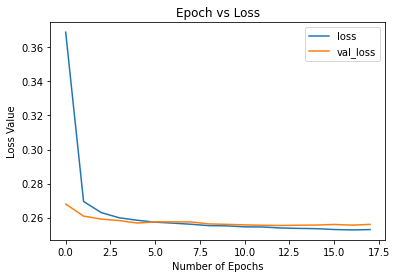

In [84]:
#FINDING THE MINIMUM LOSS AT WHICH THE MODEL WASN'T OVERFITTING

loss = pd.DataFrame(model.history.history)
loss.plot()
plt.ylabel('Loss Value')
plt.xlabel('Number of Epochs')
plt.title('Epoch vs Loss')

In [85]:
# PREDICTING THE MODEL FROM THE VALIDATION SET

pred = (model.predict(X_scaled_validation)>0.5).astype('int')
pred

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

              precision    recall  f1-score   support

           0       0.93      0.47      0.63      7362
           1       0.89      0.99      0.94     30331

    accuracy                           0.89     37693
   macro avg       0.91      0.73      0.78     37693
weighted avg       0.90      0.89      0.88     37693



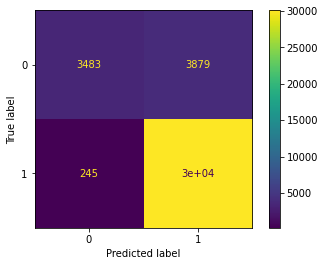

In [86]:
# NOW LET ME FIND OUT THE PERFORMANCE OF THE MODEL

# LET FIND THE CLASSIFICATION_REPORT
print(classification_report(y_validation, pred))

# DISPLAY THE CONFUSION MATRIX
ConfusionMatrixDisplay.from_predictions(y_validation,pred)

After many times of parameter tuning, the model isn't performing to my satisfaction so what I will do is to balance the loan status items. That is, I will reduce the number of the those who fully paid their loan to be almost equal to that of those who defaulted their payment of the loan. 

## Balancing the data set.

I will now reduce the number of those who fully paid their debt to almost the number of those who Charged off. By this, the model will not be highly influenced by high number of those who fully paid their debt.

In [87]:
len(df['loan_status'])

376929

In [88]:
# LET ME EXTRACT ALL THOSE WHO PAID THEIR DEBT FROM THOSE WHO DIDN'T PAY. I HAVE ALREADY FULLY PAID WITH 1, AND CHARGED OFF WITH 0

#---> Fp for those who paid
Fp = df[df['loan_status']==1]

# ---> Co for those who charged off
Co = df[df['loan_status']==0]

In [89]:
# Total number of those who charged off

len(Co)

72489

In [90]:
# Total number of those who paid fully

len(Fp)

304440

In [91]:
# NOW LET ME TAKE 80,OOO OF THOSE WHO FULLY PAID

int(100*(80000/len(Fp)))

# So I will take 26% from those who paid their debt and join them with those who didn't pay

26

In [92]:
# TAKING 26% FROM THE FULLY PAID DATA

Fp = Fp.sample(frac=0.26)

In [93]:
# NOW LET ME JOIN IT TO THOSE WHO DIDN'T PAY

df = pd.concat([Fp,Co],axis=0)

In [94]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'zipcode'],
      dtype='object')

In [95]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
zipcode                 0
dtype: int64

In [96]:
#DEFINING TARGET AND FEATURES AND CONVERT THE CATEGORICAL TO DUMMIES
X = df.drop('loan_status',axis=1)

X = pd.get_dummies(X, drop_first=True)
y= df['loan_status']

# CONVERTING THE DATAFRAME TO NUMPY ARRAYS.
X = X.values
y = y.values

# SPLITTING THE TRAIN SET FROM TEST AND VALIDATION SET
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)

# SPLITTING THE REMAINING SET INTO VALIDATION AND TEST SETS
X_validation,X_test,y_validation,y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=101)


# SCALING THE FEATURE DATA SET
X_scaled_train = scaler.fit_transform(X_train)

X_scaled_validation = scaler.transform(X_validation)

X_scaled_test = scaler.transform(X_test)

In [97]:
ad_model.fit(X_scaled_train,y_train)

AdaBoostClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      7274
           1       0.80      0.82      0.81      7890

    accuracy                           0.80     15164
   macro avg       0.80      0.80      0.80     15164
weighted avg       0.80      0.80      0.80     15164



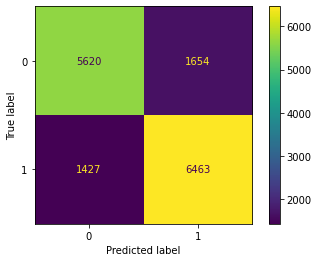

In [98]:
# MAKE PREDICTION FROM THE x_SCALED_VALIDATION SET
pred = ad_model.predict(X_scaled_validation)

# LET FIND THE CLASSIFICATION_REPORT
print(classification_report(y_validation, pred))

# DISPLAY THE CONFUSION MATRIX
ConfusionMatrixDisplay.from_predictions(y_validation,pred)

Now we can see that the accuracy score for the entire model is the same us the f1-score for those who Charged off(0). Now let me use the Artificial Neural network to do more of the hyperparameter tuning. to improve the model performance.

### ANN

In [99]:
X.shape

(151643, 86)

In [100]:
# OUTLINE THE MODEL

model = Sequential()

model.add(Dense(86, activation = 'relu'))
model.add(Dropout(0.15))

model.add(Dense(80, activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(77, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(70, activation='relu'))
model.add(Dense(60, activation = 'relu'))

#model.add(Dense())

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam' )

In [101]:
model.fit(x=X_scaled_train,y=y_train, epochs=25,
          validation_data=(X_scaled_validation, y_validation),
          batch_size=1500,callbacks=early_stopping)

Epoch 1/25
81/81 [==============================] - 1s 8ms/step - loss: 0.5277 - val_loss: 0.3873
Epoch 2/25
81/81 [==============================] - 1s 7ms/step - loss: 0.3934 - val_loss: 0.3657
Epoch 3/25
81/81 [==============================] - 1s 7ms/step - loss: 0.3714 - val_loss: 0.3607
Epoch 4/25
81/81 [==============================] - 1s 7ms/step - loss: 0.3650 - val_loss: 0.3582
Epoch 5/25
81/81 [==============================] - 1s 8ms/step - loss: 0.3617 - val_loss: 0.3572
Epoch 6/25
81/81 [==============================] - 1s 7ms/step - loss: 0.3604 - val_loss: 0.3577
Epoch 7/25
81/81 [==============================] - 1s 7ms/step - loss: 0.3585 - val_loss: 0.3558
Epoch 8/25
81/81 [==============================] - 1s 7ms/step - loss: 0.3570 - val_loss: 0.3562
Epoch 9/25
81/81 [==============================] - 1s 7ms/step - loss: 0.3565 - val_loss: 0.3561
Epoch 10/25
81/81 [==============================] - 1s 7ms/step - loss: 0.3557 - val_loss: 0.3564
Epoch 11/25
81/81 [

Text(0.5, 1.0, 'Epoch vs Loss')

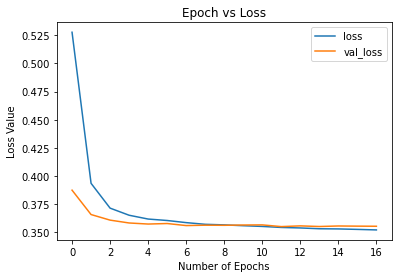

In [102]:
loss = pd.DataFrame(model.history.history)
loss.plot()
plt.ylabel('Loss Value')
plt.xlabel('Number of Epochs')
plt.title('Epoch vs Loss')

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      7274
           1       0.80      0.82      0.81      7890

    accuracy                           0.80     15164
   macro avg       0.80      0.80      0.80     15164
weighted avg       0.80      0.80      0.80     15164



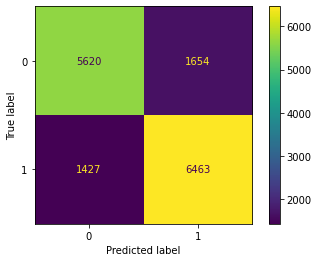

In [103]:
# NOW LET ME FIND OUT THE PERFORMANCE OF THE MODEL

# LET FIND THE CLASSIFICATION_REPORT
print(classification_report(y_validation, pred))

# DISPLAY THE CONFUSION MATRIX
ConfusionMatrixDisplay.from_predictions(y_validation,pred)

## Deploying the model

Now, since the number of those who paid their loan is almost the number of those who didn't, the accuracy_score is a good score but not the perfect because the number of those who fully paid are not the same number of those who defaulted. I want a model  that will give me an f1_score of 80 or more... I will use other algorithms as well and see. If the other models doesn't work then I will use Support Vectors Machines and see. The best model is what I will save.

In [ ]:
from sklearn.